In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

df = pd.read_csv("Dataset//Attrition.csv")

In [2]:
pd.factorize(df['Attrition'])

is_numeric_dtype(df['Attrition'])

for column in df.columns: 
    if not is_numeric_dtype(df[column]): 
        item = df[column]
        unique = list(df[column].unique())
        mapping = dict(zip(unique, range(0, len(unique) + 1)))
        df[column] = item.map(mapping).astype(int)


df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,52.000000,0,0,593,0,9,4,0,2,...,3.0,3,0,20,2.0,2,8.0,7,2,13
1,1,36.000000,0,0,1218,0,1,1,1,2,...,3.0,3,1,21,3.0,3,1.0,8,1,6
2,2,35.906122,0,1,530,1,16,3,1,3,...,3.0,3,1,7,4.0,3,1.0,5,1,2
3,3,33.000000,0,0,953,0,5,4,2,2,...,3.0,2,0,12,1.0,3,3.0,7,0,7
4,4,37.252033,0,0,1380,0,9,2,1,3,...,3.0,3,0,2,2.0,3,10.0,2,2,1


In [16]:
#Executing kmeans on Train dataset, saving sse values on sse_values list
sse_values = list() 
max_k = 30
for k in range(2, max_k + 1): 
    kmeans = KMeans(init='k-means++', n_clusters = k, max_iter = 100)
    kmeans.fit(df._get_numeric_data())
    sse_values.append(kmeans.inertia_)

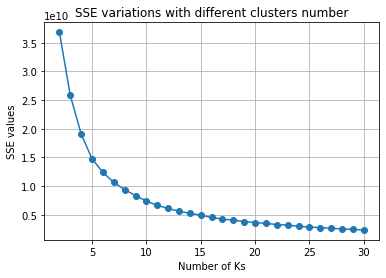

In [20]:
plt.plot(range(2, max_k + 1), sse_values, marker = "o")
plt.grid(True)
plt.title("SSE variations with different clusters number")
plt.xlabel("Number of Ks")
plt.ylabel("SSE values")
plt.show()
